# Part II - (Loan Data from Prosper)
##  by (Jehad Abu Raad)

## Investigation Overview


In this investigation, I explored the **Prosper Loan Dataset** to identify key factors that influence loan outcomes, particularly focusing on features that may affect loan status. The main attributes of interest included:

| **Aspect**                         | **Summary**                                                                                                                                      |
|------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **Borrower Rate Distribution**     | The distribution shows a concentration around certain interest rate levels, indicating standardization based on risk profiles. Mean and median rates are close, suggesting a symmetrical distribution with few outliers. |
| **Loan Original Amount**           | Loan amounts vary widely, with most loans clustered in the lower-to-mid range. There's a gradual decline in frequency as loan amounts increase.    |
| **Income Range and Loan Status**   | Higher income ranges correlate with a higher likelihood of loan completion, while lower income ranges show higher rates of delinquency and default. |
| **Employment Status and Loan Performance** | Employment status is crucial, with employed and full-time borrowers showing a lower risk of default compared to those who are unemployed or have inconsistent employment records. |
| **Relationships Between Features** | Observed relationships, such as between borrower APR, loan term, and credit score, provide insights into borrower risk profiles and factors affecting loan approval and repayment. |



## Dataset Overview and Executive Summary

| **Aspect**                         | **Summary**                                                                                                                                      |
|------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| **Dataset Overview**               | The dataset contains 113,937 entries with 81 columns, including key features such as loan amounts, borrower rates, income range, employment status, and loan status. The dataset provides a comprehensive view of the factors influencing loan performance. |
| **Key Features Investigated**      | Main features of interest include: LoanOriginalAmount, BorrowerRate, IncomeRange, EmploymentStatus, and LoanStatus. These features were selected for their potential impact on loan outcomes. |
| **Main Findings**                  | Analysis revealed that higher income and stable employment correlate with better loan performance. Borrower rate distribution is fairly symmetrical, and most loans are issued in the lower-to-mid amount range. |
| **Summary of Insights**            | The investigation highlights the importance of borrower financial stability in loan performance, with income and employment status being strong predictors of loan outcomes. |


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Display the first few rows to verify
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Visualization 1: What is the Distribution of Loan Original Amount?



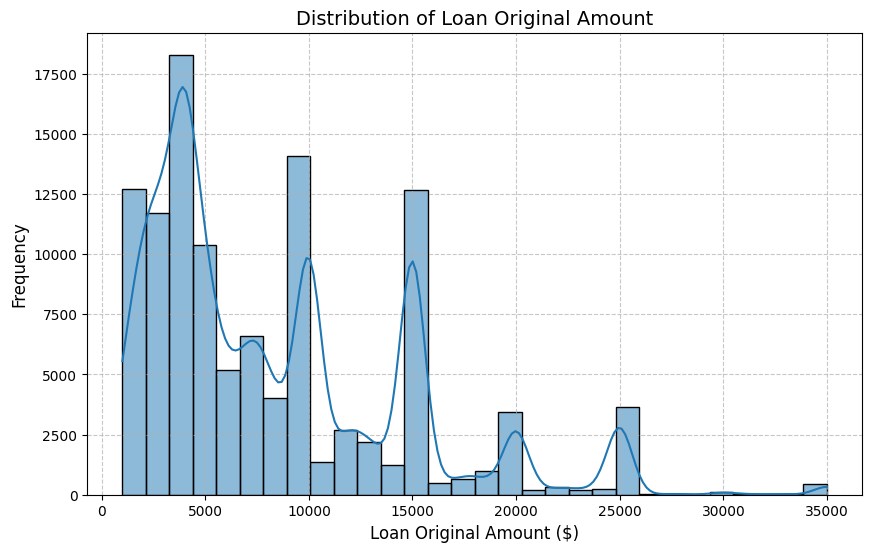

In [3]:
"""
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    'LoanOriginalAmount' (str): The name of the column to plot the histogram for.
    
"""

plt.figure(figsize=(10, 6))
sns.histplot(df['LoanOriginalAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Original Amount', fontsize=14)  # Setting the title 
plt.xlabel('Loan Original Amount ($)', fontsize=12)  # Labeling the x-axis 
plt.ylabel('Frequency', fontsize=12)  # Labeling the y-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Adding gridlines 
plt.show()

The distribution of loan initial amounts within the dataset is depicted by this histogram. Most loans are found in the lower-to-mid range, with a notable concentration of loans between $5,000 and $10,000. The frequency drastically decreases as loan amounts surpass $15,000. Smaller loans are in fact more common, as shown by the smooth curve produced by the KDE overlay, which has a few peaks around particular loan levels.


## Visualization 2: How Does Income Range Influence Loan Status?



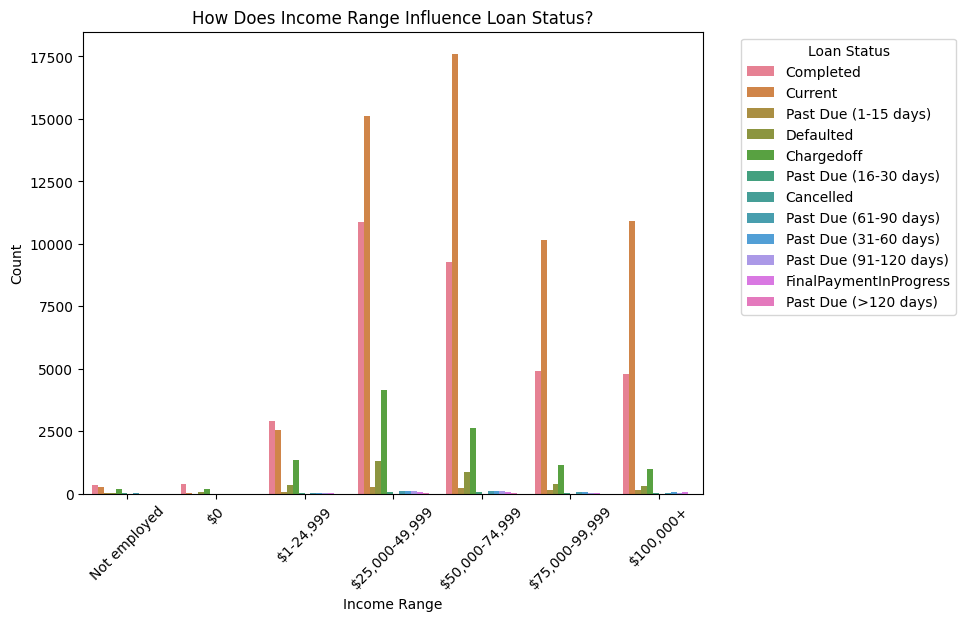

In [4]:
# to ensure that 'IncomeRange' is a categorical column with an explicit order
income_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', 
                '$50,000-74,999', '$75,000-99,999', '$100,000+']
df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories=income_order, ordered=True)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IncomeRange', hue='LoanStatus', order=income_order)
plt.title('How Does Income Range Influence Loan Status?')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

By analyzing the frequency of various loan outcomes within each income bracket, this bar chart investigates the relationship between income range and loan status. Higher income ranges appear to be usually linked to better loan performance, according to the graphic.


## Visualization 3: Is Borrower Rate Related to Credit Grade?



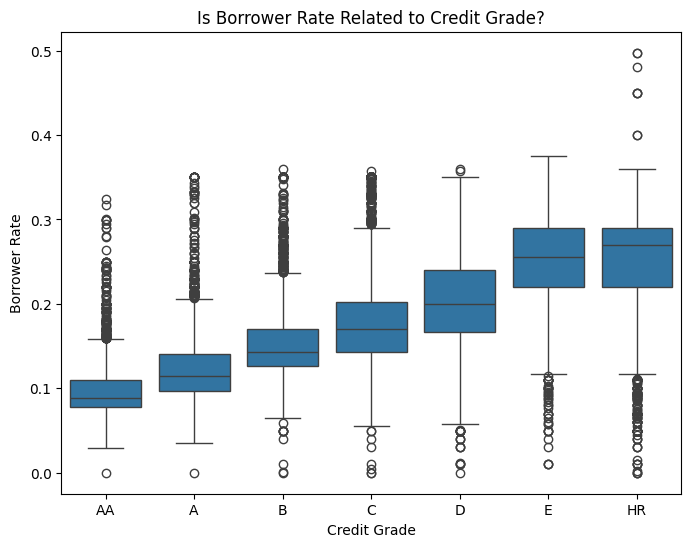

In [5]:
# Remove rows where 'CreditGrade' is null
df_filtered = df.dropna(subset=['CreditGrade'])

# Define the correct order for the ordinal variable 'CreditGrade'
credit_grade_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

plt.figure(figsize=(8, 6))
# Plot using the specified order for 'CreditGrade'
sns.boxplot(data=df_filtered, x='CreditGrade', y='BorrowerRate', order=credit_grade_order)
plt.title('Is Borrower Rate Related to Credit Grade?')
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate')
plt.show()


The association between borrower rate and credit grade is examined in this box plot. It illustrates how borrower rates change among credit classes, with better grades often linked to lower borrower rates, indicating a reduction in perceived risk. Outliers are borrower rates that substantially differ from the average rates for each credit grade; these are represented by the circles.
